## Graph creation
Given a populated papers.json, create a graphical representation.

In [4]:
import json

# Read the JSON data from file
filename = 'papers.json'
with open(filename, 'r') as file:
    papers = json.load(file)

len(papers)

17

In [8]:
import networkx as nx

# Create an empty directed graph to represent citations (paper A cites paper B)
G = nx.DiGraph()

In [9]:
for id, info in papers.items():
    G.add_node(id, **info[0])

In [11]:
for id, info in papers.items():
    for cited_paper in info[1]:
        cited_id = cited_paper['paperId']
        if G.has_node(cited_id):
            G.add_edge(id, cited_id)

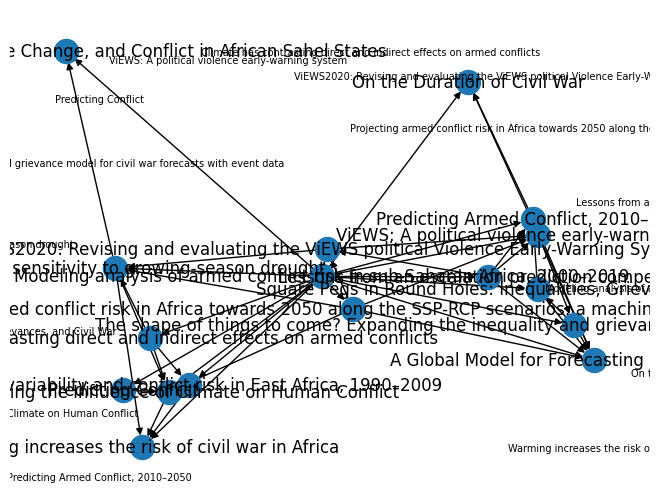

In [30]:
import matplotlib.pyplot as plt

# Create a dictionary for the labels using a dictionary comprehension
labels = {node: data['title'] for node, data in G.nodes(data=True)}

# Now draw the graph with the specified labels
pos = nx.circular_layout(G)  # or any other layout algorithm
nx.draw(G, labels=labels, with_labels=True)

# Draw custom labels with a smaller font size
nx.draw_networkx_labels(G, pos, labels, font_size=7)

# Show the plot
plt.show()